# Imports

In [ ]:
!pip install --upgrade pyalgotrading

In [1]:
from pyalgotrading.algobulls import AlgoBullsConnection

# Connection

In [2]:
connection = AlgoBullsConnection()

In [3]:
connection.get_token_url()

Please login to this URL to get your unique token: https://app.algobulls.com/settings?section=developerOptions


In [4]:
API_TOKEN = "5d2e2f177ca4a0a3f9a16782c4ade136f892ead0"
connection.set_access_token(API_TOKEN)

Access token is valid.


# Strategy Creation

## Import Strategy from pyaglostrategypool

In [5]:
! wget -O options_bear_iron_butterfly.py https://raw.githubusercontent.com/algobulls/pyalgostrategypool/master/pyalgostrategypool/options_bear_iron_butterfly.py
! sed -i '1s/^/from pyalgotrading.strategy import StrategyBase\n/' options_bear_iron_butterfly.py

In [5]:
from options_bear_iron_butterfly import StrategyOptionsLongIronButterfly as strategy_cls

In [6]:
response = connection.create_strategy(strategy_cls, overwrite=True)
response

{'message': 'Strategy saved successfully',
 'cstcId': 134286,
 'strategyId': 'c05b141c69d8415dadc16358aa83138a'}

In [7]:
strategy = response['strategyId']

# Strategy Testing

## Instruments Searching (optional)

In [8]:
instrument = connection.search_instrument('NIFTY 50', exchange='NSE')
instrument

[{'id': 61576, 'value': 'NSE:NIFTY 50'}]

## Setup Parameters

In [9]:
parameters = {
    'LEG_FOUR_NUMBER_OF_STRIKES': 2,
    'LEG_FOUR_STRIKE_DIRECTION': 2,
    'LEG_FOUR_TRADING_SYMBOL_SUFFIX': 2,
    'LEG_FOUR_TRANSACTION_TYPE': 2,
    
    'LEG_ONE_NUMBER_OF_STRIKES': 1,
    'LEG_ONE_STRIKE_DIRECTION': 0,
    'LEG_ONE_TRADING_SYMBOL_SUFFIX': 1,
    'LEG_ONE_TRANSACTION_TYPE': 1,
    
    'LEG_THREE_NUMBER_OF_STRIKES': 2,
    'LEG_THREE_STRIKE_DIRECTION': 2,
    'LEG_THREE_TRADING_SYMBOL_SUFFIX': 2,
    'LEG_THREE_TRANSACTION_TYPE': 1,
    
    'LEG_TWO_NUMBER_OF_STRIKES': 2,
    'LEG_TWO_STRIKE_DIRECTION': 0,
    'LEG_TWO_TRADING_SYMBOL_SUFFIX': 1,
    'LEG_TWO_TRANSACTION_TYPE': 2
}

In [10]:
initial_virtual_funds = 1450000     # in Rupees

## Backtesting

### Start

In [11]:
connection.backtest(
    strategy=strategy, 
    start='2021-08-01 09:15 +0530', 
    end='2023-07-31 15:30 +0530', 
    instrument='NSE:NIFTY 50', 
    lots=10,
    parameters=parameters, 
    candle='1 hour',
    initial_funds_virtual=initial_virtual_funds

)


Starting the strategy 'Options Long Iron Butterfly Template' in BACKTESTING mode...
╒═════════════════════════╤════════════════════════════════════════╕
│ Config                  │ Value                                  │
╞═════════════════════════╪════════════════════════════════════════╡
│ Strategy Name           │ Options Long Iron Butterfly Template   │
├─────────────────────────┼────────────────────────────────────────┤
│ Trading Type            │ BACKTESTING                            │
├─────────────────────────┼────────────────────────────────────────┤
│ Instrument(s)           │ ['NSE:NIFTY 50']                       │
├─────────────────────────┼────────────────────────────────────────┤
│ Quantity/Lots           │ 10                                     │
├─────────────────────────┼────────────────────────────────────────┤
│ Start Timestamp         │ 2021-08-01 09:15:00+05:30              │
├─────────────────────────┼────────────────────────────────────────┤
│ End Timestamp   

### Status

In [12]:
connection.get_backtesting_job_status(strategy)

{'message': 'STARTED', 'status': 2}

### Logs

In [13]:
logs = connection.get_backtesting_logs(strategy)

Execution Progress:   0%|          | 0/63008100.0 [00:00<?]

In [14]:
print(logs)

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



### Stop

In [15]:
connection.stop_backtesting_job(strategy)

Stopping BACKTESTING job... Fail.
Forbidden: Content: b'{"message":"Strategy execution is already in the STOPPING state."}' | Raw: b''


### Profit and Loss Reports

In [16]:
pnl_reports = connection.get_backtesting_report_pnl_table(strategy, country='India')
pnl_reports

,instrument_segment,instrument_tradingsymbol,entry_timestamp,entry_transaction_type,entry_quantity,entry_currency,entry_price,exit_timestamp,exit_transaction_type,exit_quantity,exit_currency,exit_price,pnl_absolute,pnl_cumulative_absolute,brokerage,net_pnl
0,NFO,NIFTY29JUN2319000PE,2023-06-28 09:15:00+05:30,SELL,500,₹,188.50,2023-06-28 15:30:00+05:30,BUY,500,₹,188.50,0.0,0.0,0,0.0
1,NFO,NIFTY06JUL2319200PE,2023-06-30 09:15:00+05:30,SELL,500,₹,156.70,2023-06-30 15:30:00+05:30,BUY,500,₹,86.35,35175.0,35175.0,0,35175.0
2,NFO,NIFTY06JUL2319200PE,2023-06-30 09:15:00+05:30,BUY,500,₹,156.70,2023-06-30 15:30:00+05:30,SELL,500,₹,86.35,-35175.0,0.0,0,-35175.0
3,NFO,NIFTY06JUL2319200CE,2023-06-30 09:15:00+05:30,SELL,500,₹,30.00,2023-06-30 15:30:00+05:30,BUY,500,₹,74.75,-22375.0,-22375.0,0,-22375.0
4,NFO,NIFTY06JUL2319150CE,2023-06-30 09:15:00+05:30,BUY,500,₹,43.00,2023-06-30 15:30:00+05:30,SELL,500,₹,103.40,30200.0,7825.0,0,30200.0
5,NFO,NIFTY06JUL2319300CE,2023-07-03 09:15:00+05:30,BUY,500,₹,46.00,2023-07-03 15:30:00+05:30,SELL,500,₹,83.90,18950.0,26775.0,0,18950.0
6,NFO,NIFTY06JUL2319350CE,2023-07-03 09:15:00+05:30,SELL,500,₹,22.10,2023-07-03 15:30:00+05:30,BUY,500,₹,57.90,-17900.0,8875.0,0,-17900.0
7,NFO,NIFTY06JUL2319350PE,2023-07-03 09:15:00+05:30,BUY,500,₹,159.20,2023-07-03 15:30:00+05:30,SELL,500,₹,88.95,-35125.0,-26250.0,0,-35125.0
8,NFO,NIFTY06JUL2319350PE,2023-07-03 09:15:00+05:30,SELL,500,₹,159.20,2023-07-03 15:30:00+05:30,BUY,500,₹,88.95,35125.0,8875.0,0,35125.0
9,NFO,NIFTY06JUL2319450CE,2023-07-04 09:15:00+05:30,BUY,500,₹,35.00,2023-07-04 15:30:00+05:30,SELL,500,₹,31.65,-1675.0,7200.0,0,-1675.0


### Statistics Reports

#### Statistics

In [17]:
connection.get_backtesting_report_statistics(strategy, initial_funds=initial_virtual_funds)

Generating Statistics for already fetched P&L data...


/home/pratikurkude/projects/myenv/lib/python3.10/site-packages/pyalgotrading/algobulls/connection.py:619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _returns_df['entry_timestamp'] = _returns_df['entry_timestamp'].dt.tz_localize(None)  # Note: Quantstats has a bug. It doesn't accept the df index, which is set below, with timezone. Hence, we have to drop the timezone info


                    Strategy
------------------  ----------
Start Period        2023-06-28
End Period          2023-07-31
Risk-Free Rate      0.0%
Time in Market      96.0%

Cumulative Return   3.41%
CAGR﹪              44.85%

Sharpe              1.3
Prob. Sharpe Ratio  64.32%
Sortino             1.75
Sortino/√2          1.24
Omega               1.25

Max Drawdown        -6.29%
Longest DD Days     11

Gain/Pain Ratio     0.25
Gain/Pain (1M)      -

Payoff Ratio        0.58
Profit Factor       1.25
Common Sense Ratio  1.32
CPC Index           0.49
Tail Ratio          1.06
Outlier Win Ratio   2.97
Outlier Loss Ratio  2.31

MTD                 0.96%
3M                  3.41%
6M                  3.41%
YTD                 3.41%
1Y                  3.41%
3Y (ann.)           44.85%
5Y (ann.)           44.85%
10Y (ann.)          44.85%
All-time (ann.)     44.85%

Avg. Drawdown       -3.57%
Avg. Drawdown Days  7
Recovery Factor     0.54
Ulcer Index         0.02
Serenity Index      0.97


#### Quantstats Full Report

Generating Statistics for already fetched P&L data...


/home/pratikurkude/projects/myenv/lib/python3.10/site-packages/pyalgotrading/algobulls/connection.py:619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _returns_df['entry_timestamp'] = _returns_df['entry_timestamp'].dt.tz_localize(None)  # Note: Quantstats has a bug. It doesn't accept the df index, which is set below, with timezone. Hence, we have to drop the timezone info


                           Strategy
-------------------------  ----------
Start Period               2023-06-28
End Period                 2023-07-31
Risk-Free Rate             0.0%
Time in Market             96.0%

Cumulative Return          3.41%
CAGR﹪                     44.85%

Sharpe                     1.3
Prob. Sharpe Ratio         64.32%
Smart Sharpe               0.87
Sortino                    1.75
Smart Sortino              1.17
Sortino/√2                 1.24
Smart Sortino/√2           0.83
Omega                      1.25

Max Drawdown               -6.29%
Longest DD Days            11
Volatility (ann.)          32.18%
Calmar                     7.13
Skew                       -1.07
Kurtosis                   2.54

Expected Daily %           0.15%
Expected Monthly %         1.69%
Expected Yearly %          3.41%
Kelly Criterion            13.48%
Risk of Ruin               0.0%
Daily Value-at-Risk        -3.17%
Expected Shortfall (cVaR)  -3.17%

Max Consecutive Wins       3


None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2023-07-21,2023-07-27,2023-07-31,10,-6.286927,-2.623393
2,2023-07-03,2023-07-07,2023-07-14,11,-2.843099,-2.460989
3,2023-07-18,2023-07-18,2023-07-19,1,-1.594775,0.000000


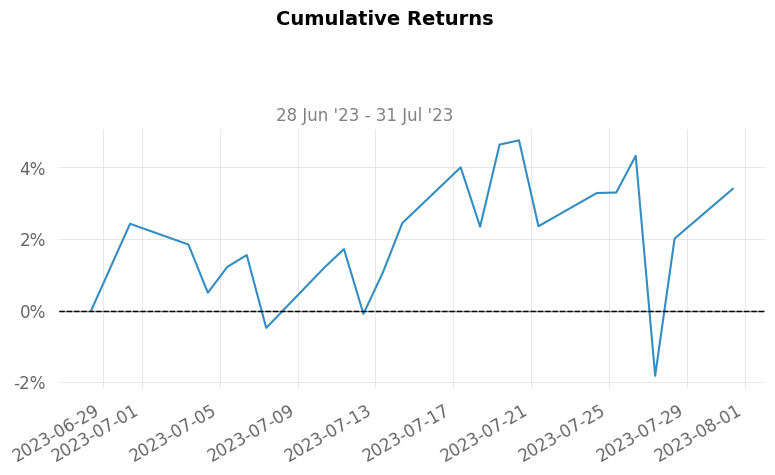

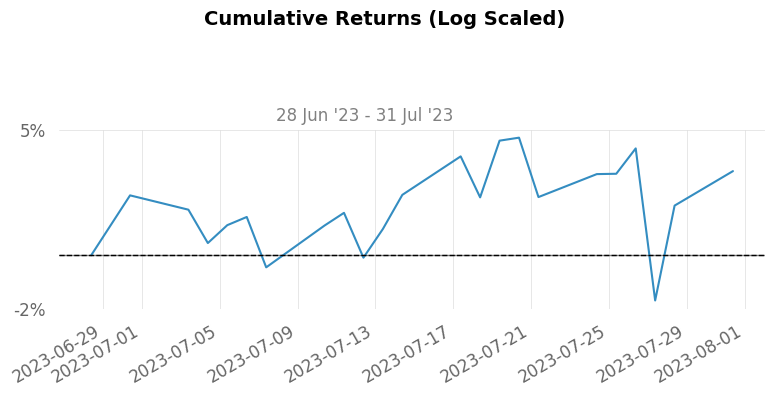

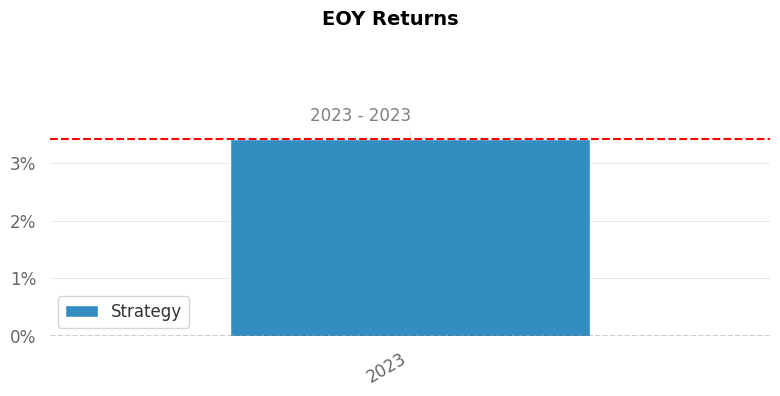

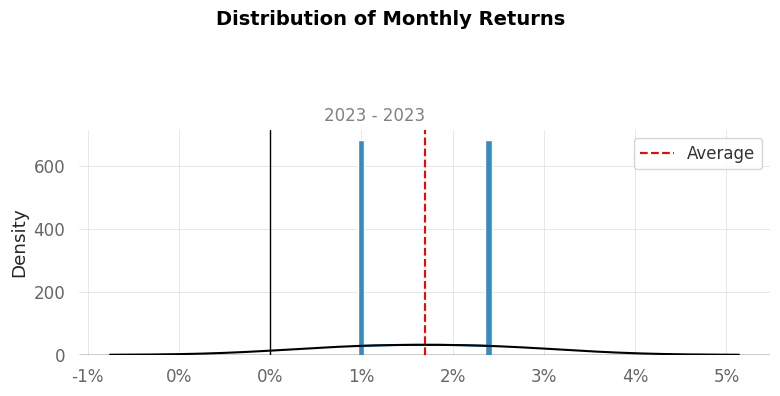

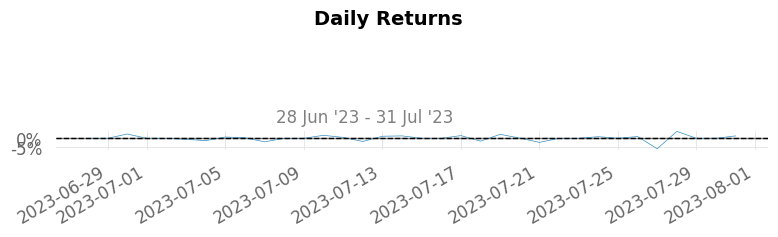

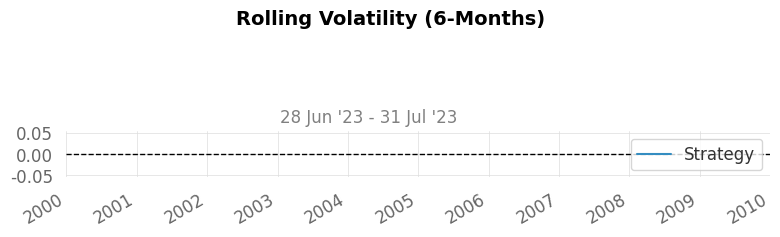

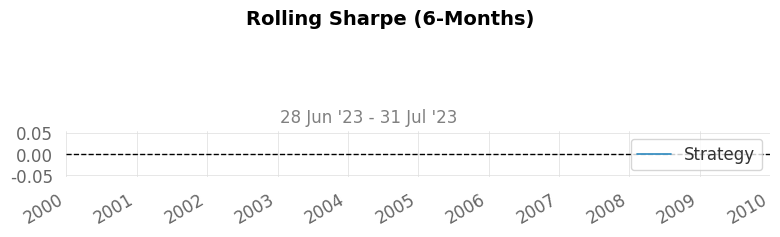

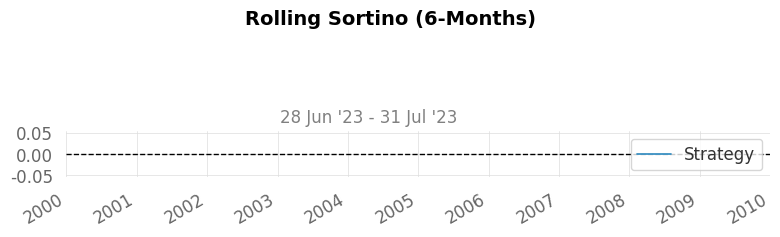

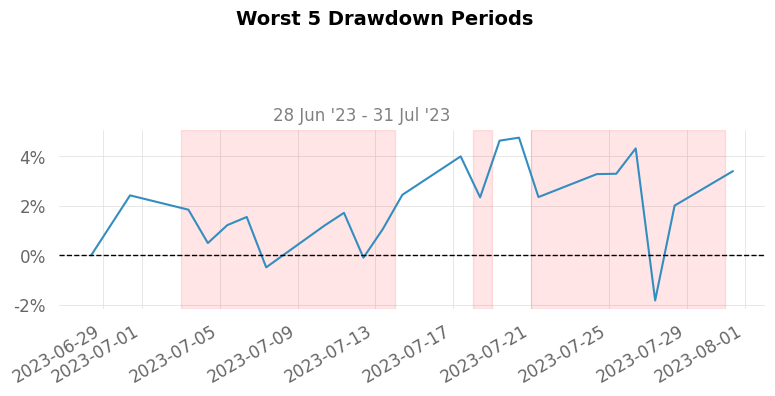

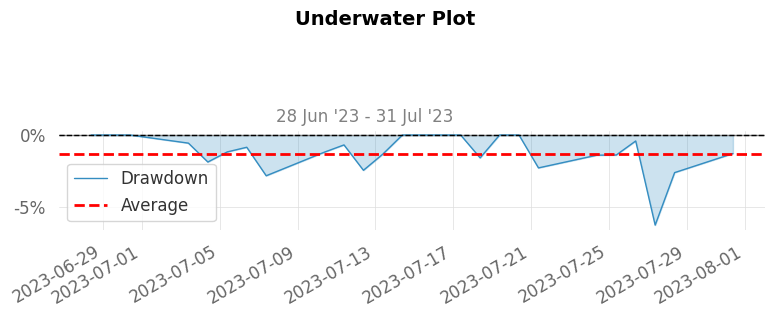

/home/pratikurkude/projects/myenv/lib/python3.10/site-packages/quantstats/stats.py:983: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  returns = returns.pivot('Year', 'Month', 'Returns').fillna(0)


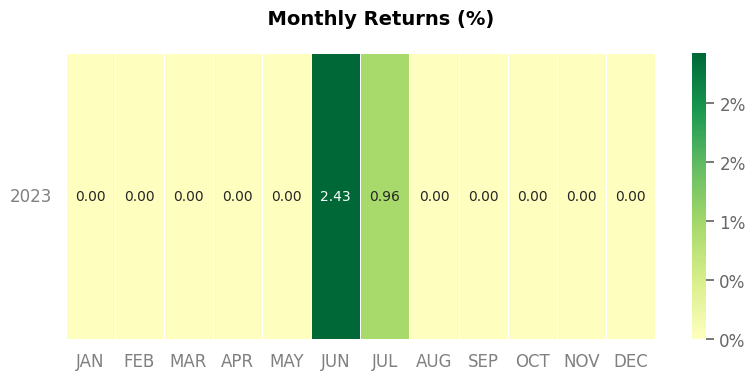

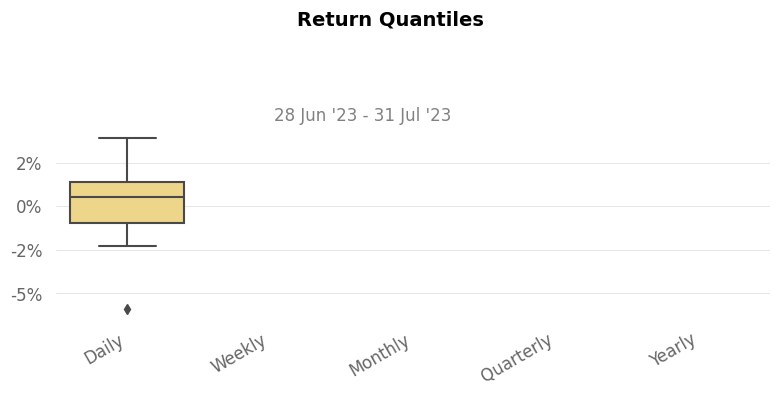

/home/pratikurkude/projects/myenv/lib/python3.10/site-packages/quantstats/stats.py:983: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  returns = returns.pivot('Year', 'Month', 'Returns').fillna(0)


In [18]:
connection.get_backtesting_report_statistics(strategy, report='full', html_dump=True, initial_funds=initial_virtual_funds)

### Order History

In [19]:
order_history = connection.get_backtesting_report_order_history(strategy)
print(order_history)

+------------------+----------------------------------+
| Order ID         | dc2842a62b9d42718b9f1da940bb40bc |
| Transaction Type | BUY                              |
| Instrument       | NSE:NIFTY03AUG2319750PE          |
| Quantity         | 500                              |
| Price            | ₹138.9                           |
+------------------+----------------------------------+
+-----------------------------+------------------------+
| timestamp_created           | state                  |
|-----------------------------+------------------------|
| 2023-10-21T13:34:26.130774Z | COMPLETE               |
| 2023-10-21T13:34:26.130757Z | OPEN                   |
| 2023-10-21T13:34:26.130738Z | OPEN PENDING           |
| 2023-10-21T13:34:26.130716Z | VALIDATION PENDING     |
| 2023-10-21T13:34:26.130655Z | PUT ORDER REQ RECEIVED |
+-----------------------------+------------------------+

+------------------+----------------------------------+
| Order ID         | 22882fa6d3774d44b

---

## Papertrading

### Start

In [ ]:
connection.papertrade(
    strategy=strategy, 
    start='9:15 +0530', 
    end='15:00 +0530',  
    instruments='NSE:SBIN', 
    lots=5,
    parameters=parameters, 
    candle='1 minute',
)

### Status

In [ ]:
connection.get_papertrading_job_status(strategy)

### Logs

In [ ]:
logs = connection.get_papertrading_logs(strategy)
print(logs)

### Stop

In [ ]:
connection.stop_papertrading_job(strategy)

### Profit and Loss Reports (Paper Trading)

In [ ]:
pnl_reports = connection.get_papertrading_report_pnl_table(strategy)
pnl_reports

### Statistics Reports (Paper Trading)

#### Statistics

In [ ]:
connection.get_papertrading_report_statistics(strategy)

#### Quantstats Full Report

In [ ]:
connection.get_papertrading_report_statistics(strategy, mode='quantstats', report='full', html_dump=True)

### Order History (Paper Trading)

In [ ]:
order_history = connection.get_papertrading_report_order_history(strategy)
print(order_history)

---

## Live Trading (Real Trading)

### Start

In [ ]:
connection.realtrade(
    strategy=strategy, 
    start='8:00 +0530', 
    end='15:00 +0530', 
    instruments='NSE:SBIN', 
    lots=5,
    parameters=parameters, 
    candle='1 minute',
    broking_id=73,
    broking_details=broking_details
)

### Status

In [ ]:
connection.get_realtrading_job_status(strategy)

### Logs

In [ ]:
logs = connection.get_realtrading_logs(strategy)
print(logs)

### Stop

In [ ]:
connection.stop_realtrading_job(strategy)

### Profit and Loss Reports (Live Trading)

In [ ]:
pnl_reports = connection.get_realtrading_report_pnl_table(strategy)
pnl_reports

### Statistics Reports (Live Trading)

#### Statistics

In [ ]:
connection.get_realtrading_report_statistics(strategy)

#### Quantstats Full Report

In [ ]:
connection.get_realtrading_report_statistics(strategy, mode='quantstats', report='full', html_dump=True)